# **QSAR Model Building of CDK Inhibitors**

Yuzhu Duan

# Read in data

In [1]:
import pandas as pd

In [10]:
dataset = pd.read_csv('data/cdk_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.638272
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
290,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
292,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [11]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
290,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
292,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Y = dataset.iloc[:,-1]
Y

0      4.698970
1      4.698970
2      5.638272
3      4.698970
4      5.619789
         ...   
289    6.000000
290    6.000000
291    6.000000
292    6.000000
293    6.000000
Name: pIC50, Length: 294, dtype: float64

# Remove low variance features

In [13]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP16,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP115,PubchemFP116,...,PubchemFP716,PubchemFP734,PubchemFP737,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP820,PubchemFP821
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,0,1,0,0,0,0,1,0,0,...,1,1,0,1,0,1,1,0,0,1
290,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.to_csv('descriptor_list.csv', index = False)

In the app, use the following to get this same descriptor list
of 219 variables from the initial set of 881 variables
```py
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]
```

# Random Forest Regression Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8026777322602763

## Model Prediction

In [19]:
Y_pred = model.predict(X)
Y_pred[:5]

array([4.76777727, 4.76748922, 5.41776118, 4.86691616, 5.12983494])

## Model Performance

In [20]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.19
Coefficient of determination (R^2): 0.80


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

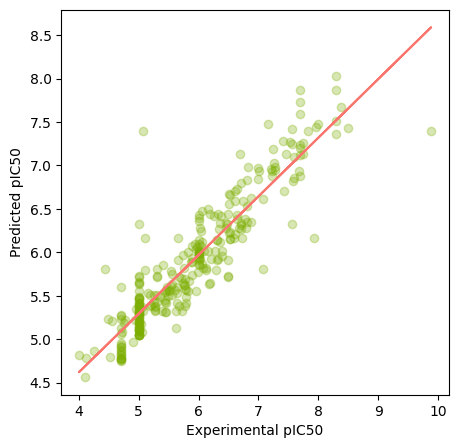

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [23]:
import pickle

In [24]:
pickle.dump(model, open('cdk_model.pkl', 'wb'))